In [1]:
import pickle
import os
from notebook_utils import plot_dendogram_and_tsne, explain_predictions
import sys
sys.path.append('..')
from utils import get_texts, Tokenizer, DataGenerator, lstm_model
from log import logger

%load_ext autoreload
%autoreload 2

matplotlib.pyplot - DEBUG - Loaded backend module://ipykernel.pylab.backend_inline version unknown.


# Get Hiddens

In [2]:
main_dir = '..'
feature_type = 'word'
character_level = False
language = 'hebrew'
seq_len = 32
batch_size = 1
lstm_dim = 512

In [3]:
path = os.path.join('..', 'data', 'hidden_states', f'{feature_type}_{language}_lstm_{lstm_dim}_seq_len_{seq_len}.pkl')

with open(path, 'rb') as f:
    hiddens = pickle.load(f)

matplotlib.axes._base - DEBUG - update_title_pos
matplotlib.axes._base - DEBUG - update_title_pos
matplotlib.axes._base - DEBUG - update_title_pos
matplotlib.axes._base - DEBUG - update_title_pos


Variance PCA: 1.0000001192092896


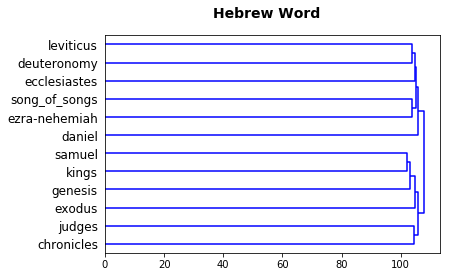

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 768 samples in 0.003s...
[t-SNE] Computed neighbors for 768 samples in 0.152s...
[t-SNE] Computed conditional probabilities for sample 768 / 768
[t-SNE] Mean sigma: 2.510109
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.753967


matplotlib.axes._base - DEBUG - update_title_pos


[t-SNE] KL divergence after 1000 iterations: 2.002250


matplotlib.axes._base - DEBUG - update_title_pos
matplotlib.axes._base - DEBUG - update_title_pos
matplotlib.axes._base - DEBUG - update_title_pos


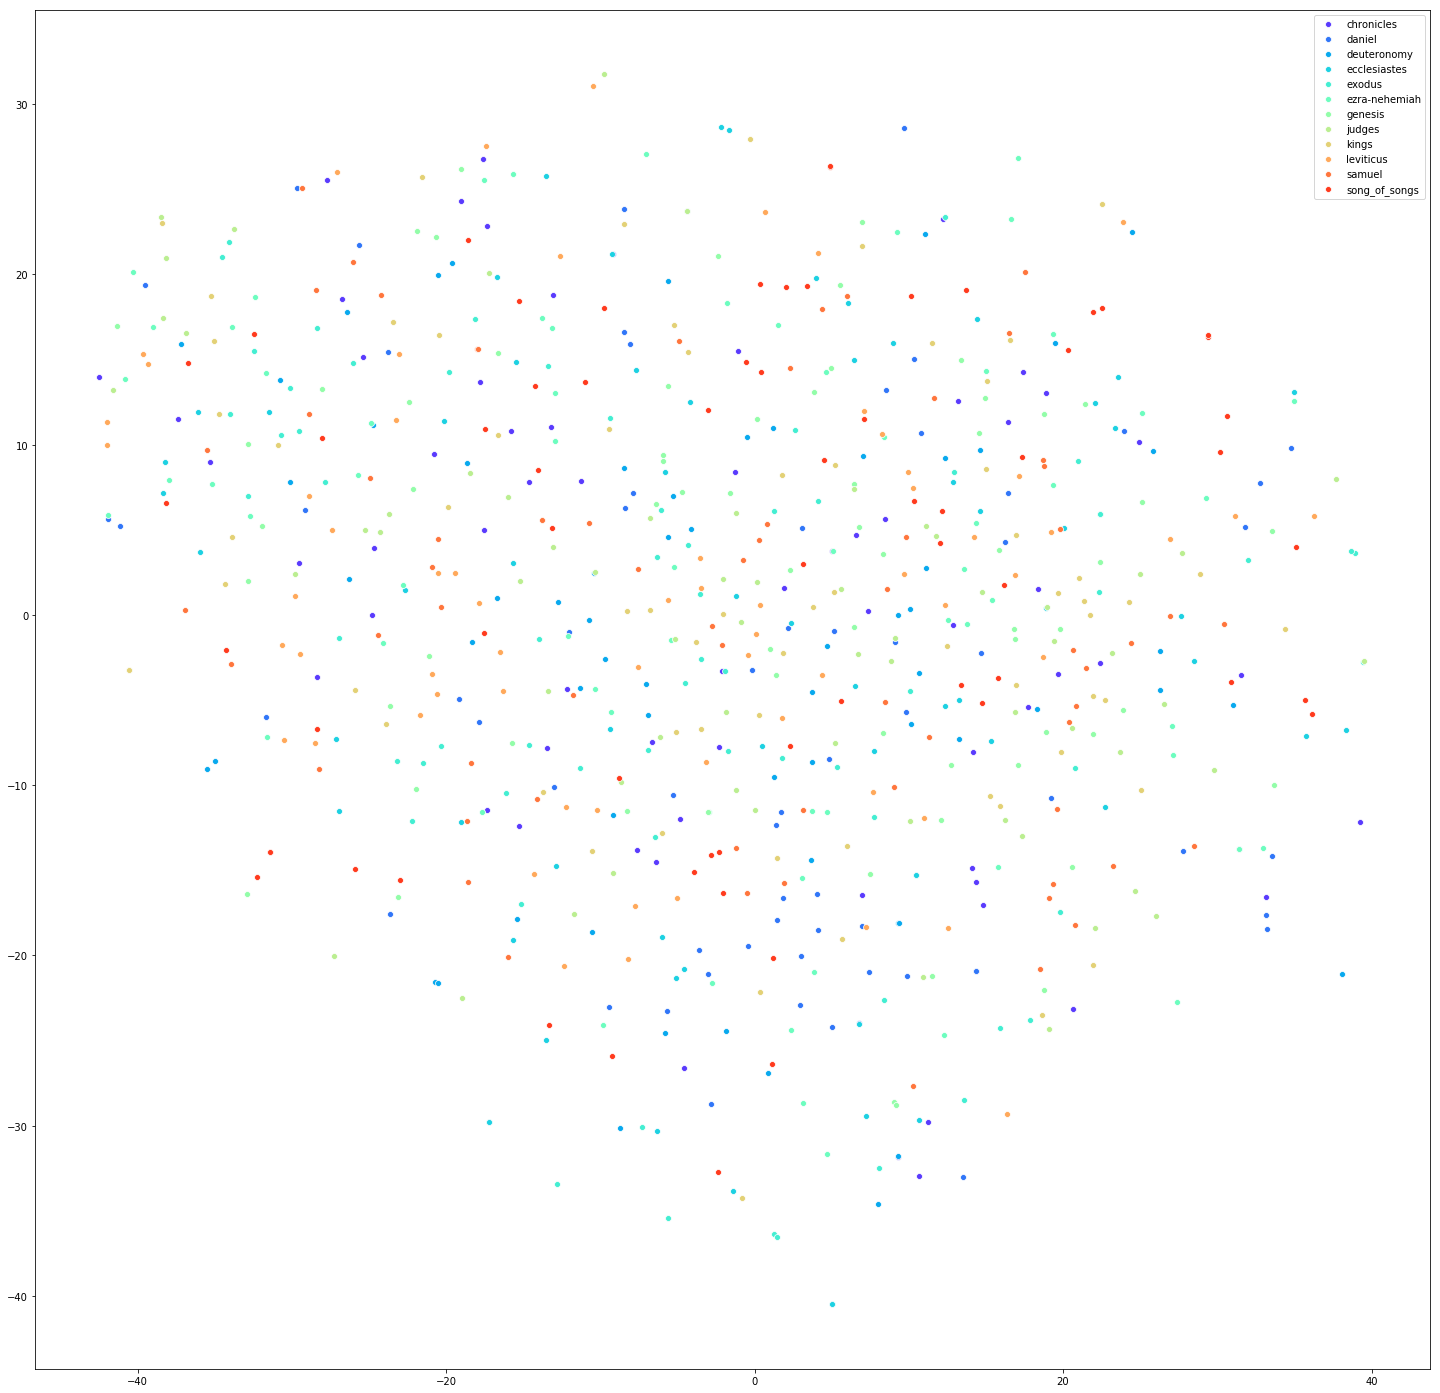

matplotlib.axes._base - DEBUG - update_title_pos
matplotlib.axes._base - DEBUG - update_title_pos
matplotlib.axes._base - DEBUG - update_title_pos
matplotlib.axes._base - DEBUG - update_title_pos


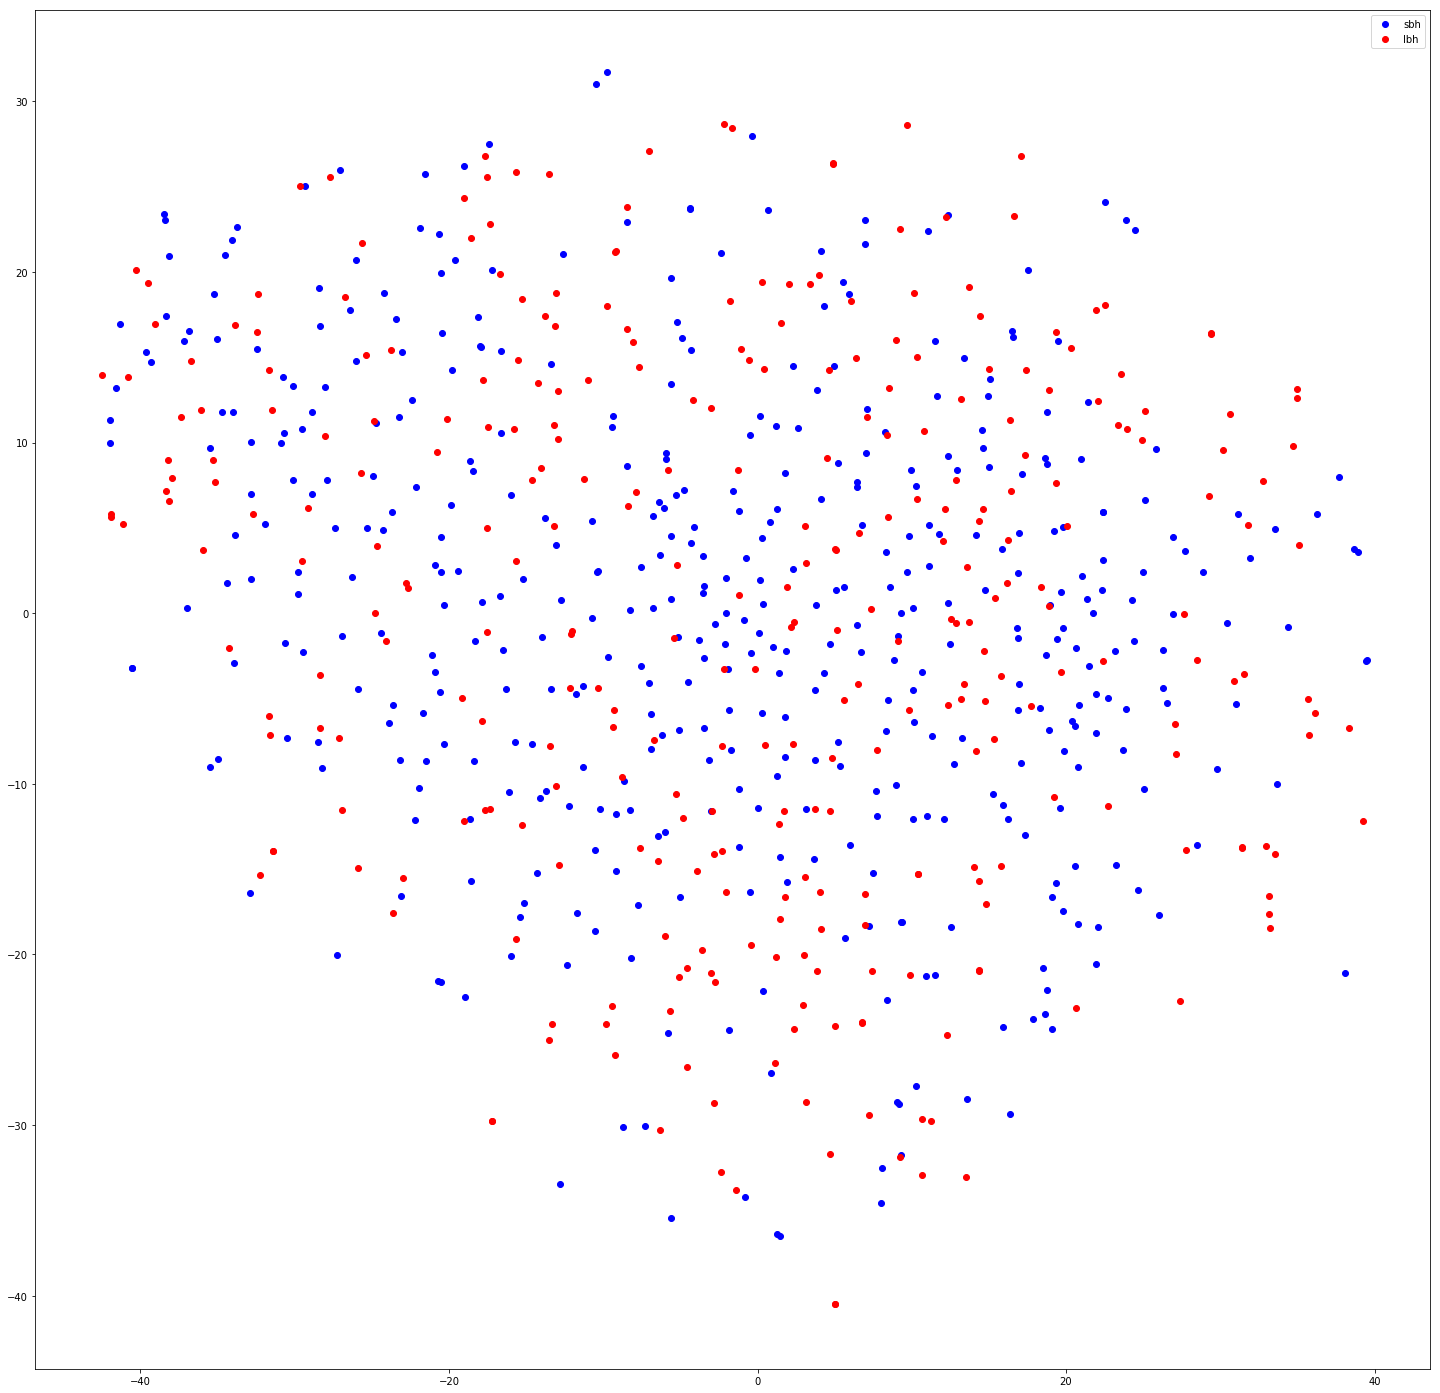

matplotlib.axes._base - DEBUG - update_title_pos
matplotlib.axes._base - DEBUG - update_title_pos
matplotlib.axes._base - DEBUG - update_title_pos
matplotlib.axes._base - DEBUG - update_title_pos


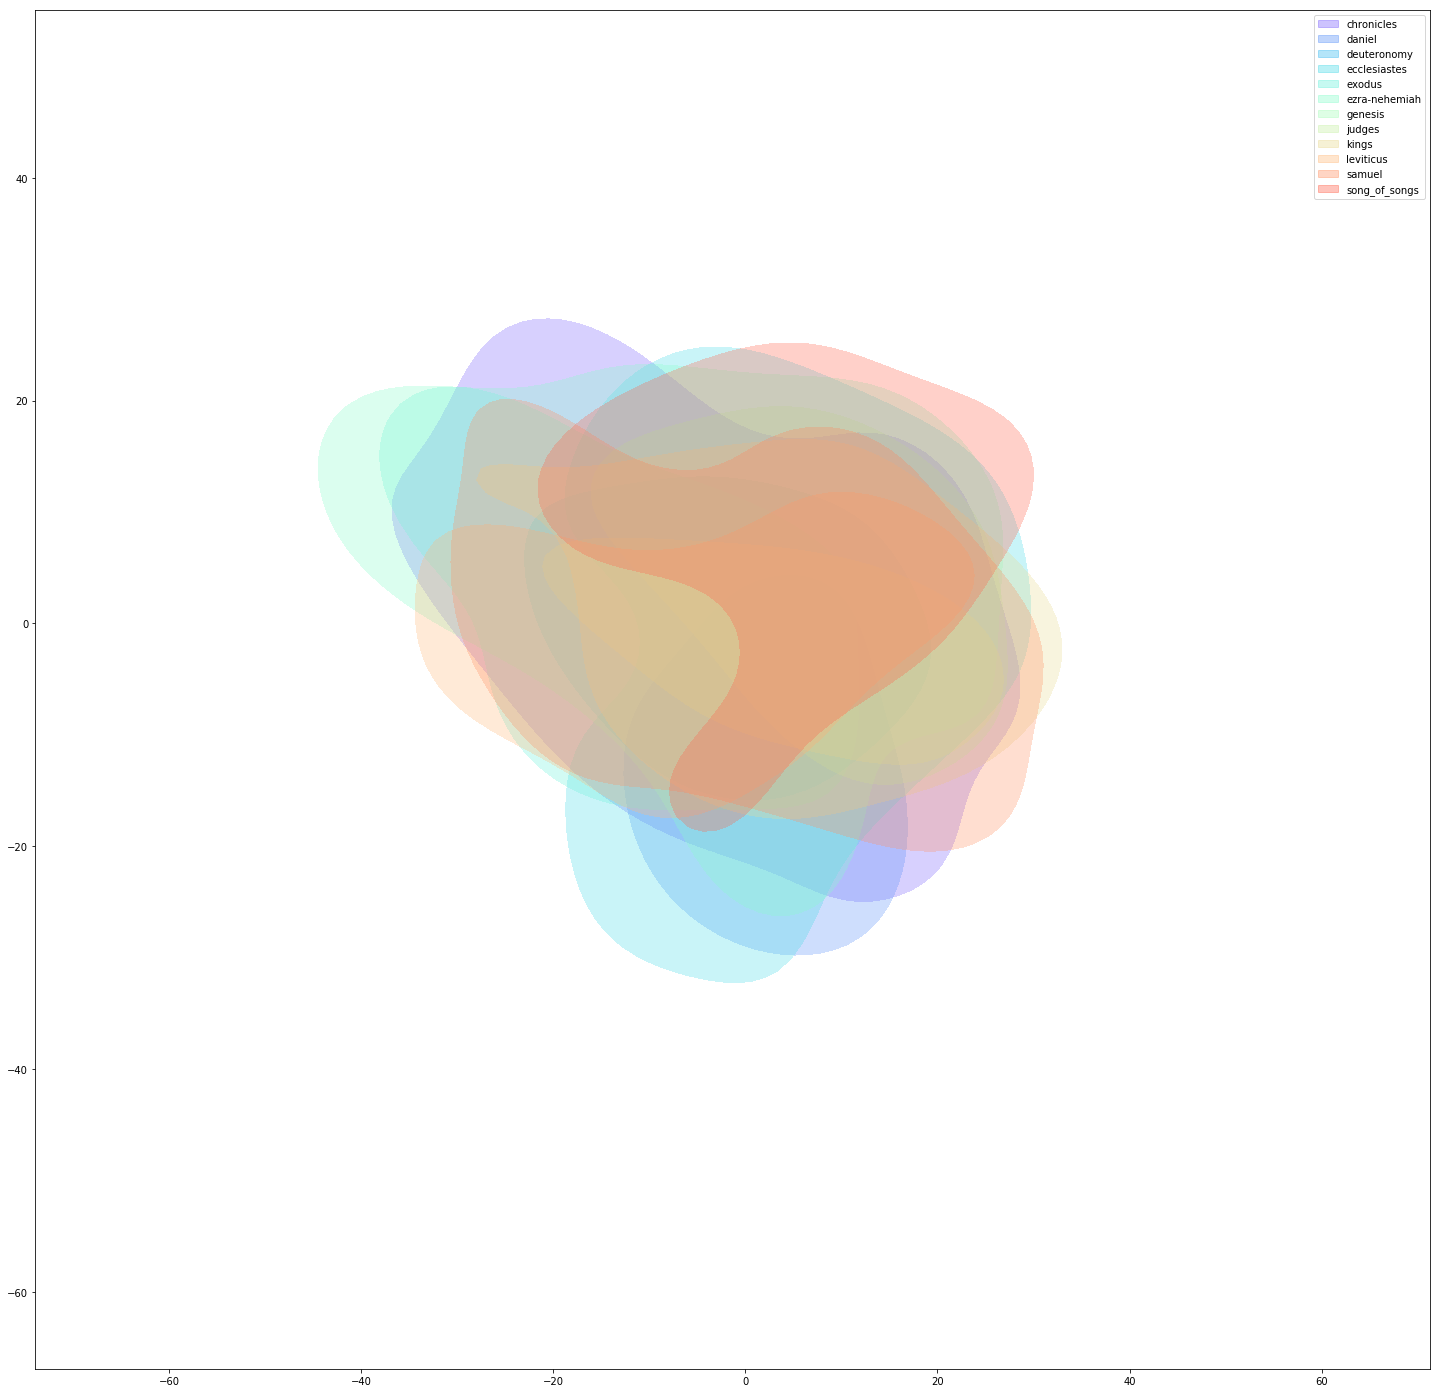

matplotlib.axes._base - DEBUG - update_title_pos
matplotlib.axes._base - DEBUG - update_title_pos
matplotlib.axes._base - DEBUG - update_title_pos
matplotlib.axes._base - DEBUG - update_title_pos


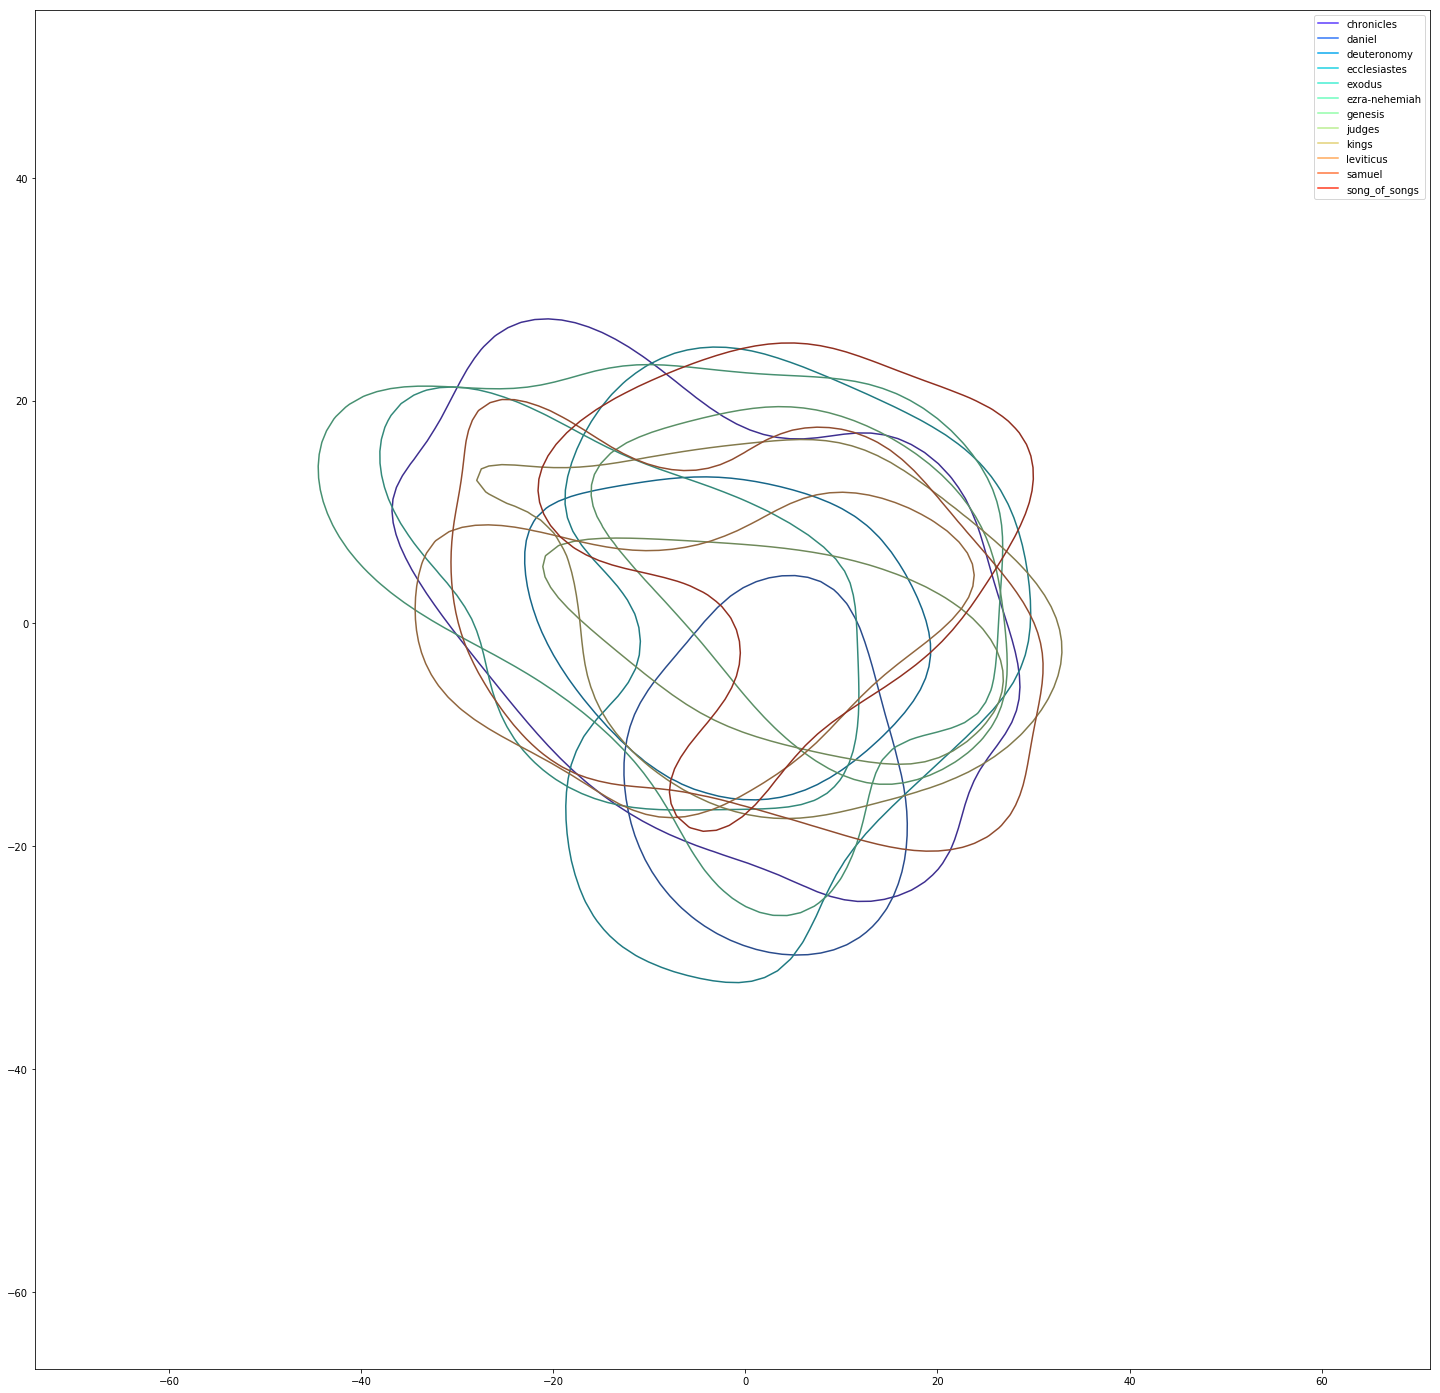

In [5]:
plot_dendogram_and_tsne(hiddens, 'Hebrew Word', pca_components=170)

# Explain Predictions

In [ ]:



texts = get_texts(main_dir, language, feature_type, character_level)
tokenizer = Tokenizer(texts.values(), character_level=character_level)
test_generator = DataGenerator(tokenizer,
                               tokenizer.full_text,
                               seq_len=seq_len,
                               batch_size=batch_size,
                               with_embedding=True,
                               train=False)



file_path = os.path.join(main_dir, 'models',
                         f'{feature_type}_{language}_lstm_{lstm_dim}')

if character_level:
    file_path += '_character_level'

file_path += '.h5'

logger.info(f"Loading {file_path}")

prediction_model = lstm_model(num_words=tokenizer.num_words,
                              lstm_dim=lstm_dim,
                              seq_len=1,
                              batch_size=batch_size,
                              stateful=True,
                              return_state=False,
                              flatten=True)

prediction_model.load_weights(file_path)


In [ ]:
file_name = f'{feature_type}_{language}_lstm_{lstm_dim}_seq_len_{seq_len}'
if character_level:
    file_name += '_character-level'
file_name += '.pkl'


seeds_path = os.path.join(main_dir, 'data', 'seeds', file_name)

with open(seeds_path, 'rb') as f:
    seeds = pickle.load(f)

In [ ]:
explain_predictions(seeds, prediction_model, tokenizer)